<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/Exploratory_data_analysis_mentor_session_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Seaborn learning:


https://seaborn.pydata.org/archive/0.11/index.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset_test/Uber_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df=data.copy()

In [ ]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [ ]:
df['pickup_dt']=pd.to_datetime(df['pickup_dt'],format='%d-%m-%Y %H:%M')
#df['pickup_dt']=pd.to_datetime(df['pickup_dt'],format="%d-%m-%Y %H:%M")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
df['start_year']=df.pickup_dt.dt.year
df['start_month']=df.pickup_dt.dt.month_name()
df['start_hour']=df.pickup_dt.dt.hour
df['start_day']=df.pickup_dt.dt.day
df['week_day']=df.pickup_dt.dt.day_name()

In [ ]:
df.drop('pickup_dt',inplace=True,axis=1)

In [ ]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,1,1,1,Thursday


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


In [ ]:
df.isnull().sum()

,0
borough,3043
pickups,0
spd,0
vsb,0
temp,359
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [ ]:
df.borough.value_counts(normalize=True,dropna=False)

,proportion
borough,
Bronx,0.149239
Brooklyn,0.149239
EWR,0.149239
Manhattan,0.149239
Queens,0.149239
Staten Island,0.149239
Unknown,0.104567


In [ ]:
df['borough'].fillna('Unknown', inplace =True)

In [ ]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

In [ ]:
df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,359
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [ ]:
df.loc[df['temp'].isnull()==True,'borough'].value_counts()

,count
borough,
Brooklyn,359


In [ ]:
df.loc[df['temp'].isnull()==True,'start_month'].value_counts()

,count
start_month,
January,359


In [ ]:
df['temp']=df['temp'].fillna(value=df.loc[(df['borough']=='Brooklyn') & (df['start_month']=='January'),'temp'].mean())

In [ ]:
df['temp']=df['temp'].fillna(value=df.groupby(['borough','start_month'])['temp'].transform('mean'))

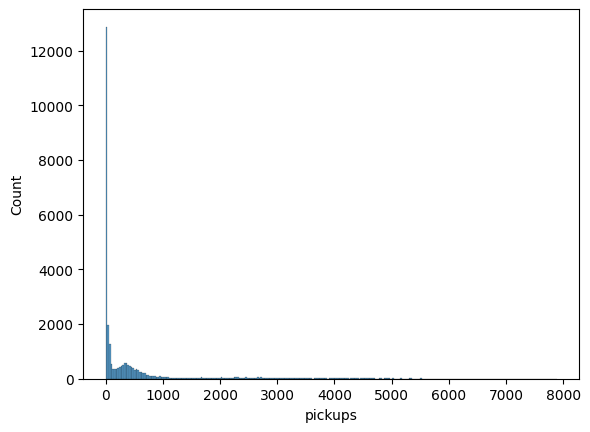

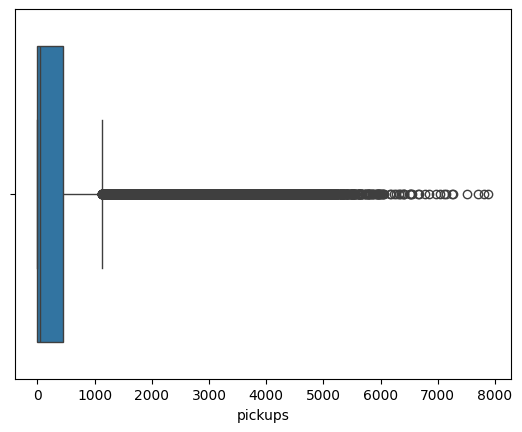

In [ ]:
sns.histplot(data=df,x='pickups')
plt.show()
sns.boxplot(data=df,x='pickups')
plt.show()

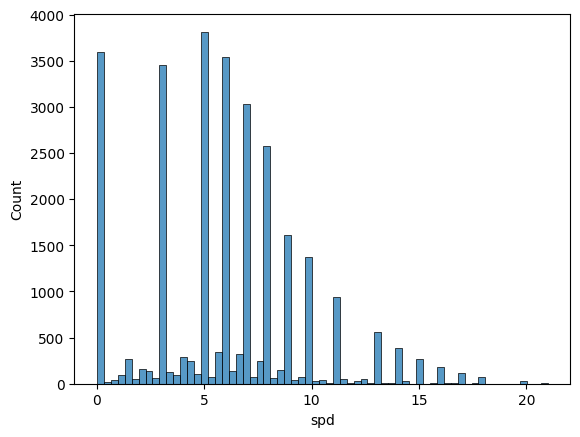

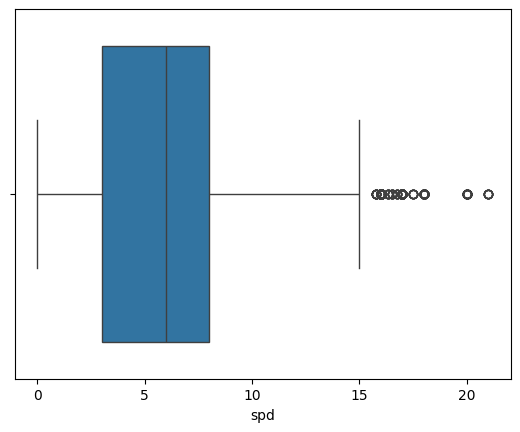

In [ ]:
sns.histplot(data=df,x='spd')
plt.show()
sns.boxplot(data=df,x='spd')
plt.show()

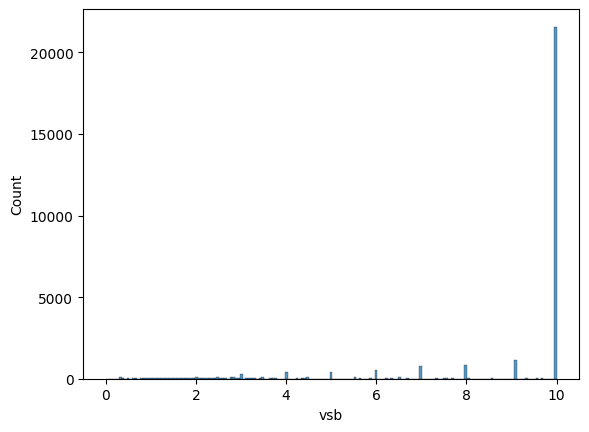

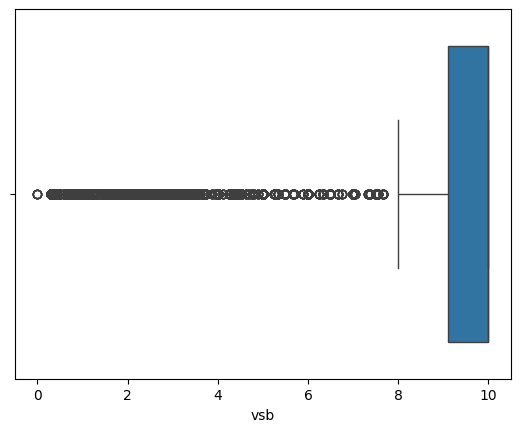

In [ ]:
sns.histplot(data=df,x='vsb')
plt.show()
sns.boxplot(data=df,x='vsb')
plt.show()

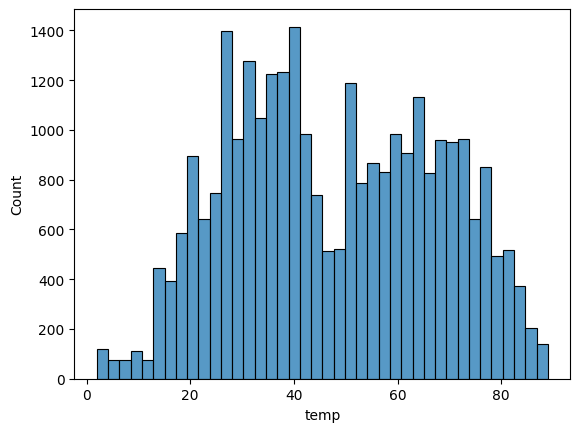

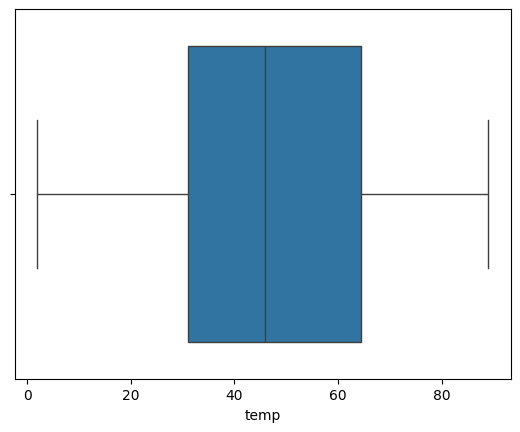

In [ ]:
sns.histplot(data=df,x='temp')
plt.show()
sns.boxplot(data=df,x='temp')
plt.show()

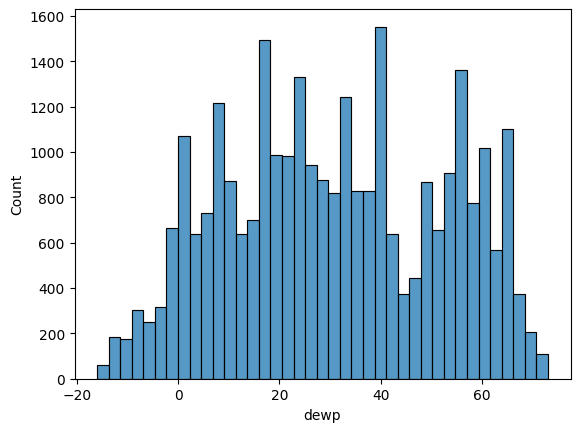

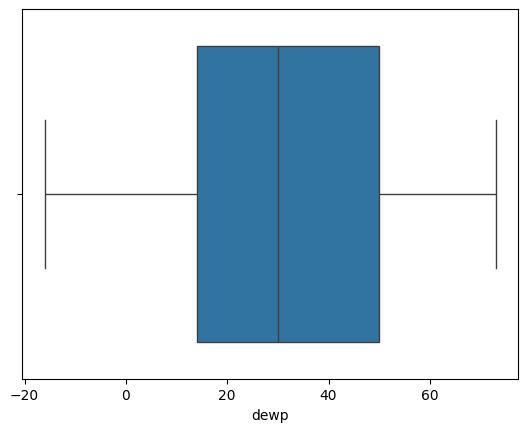

In [ ]:
sns.histplot(data=df,x='dewp')
plt.show()
sns.boxplot(data=df,x='dewp')
plt.show()

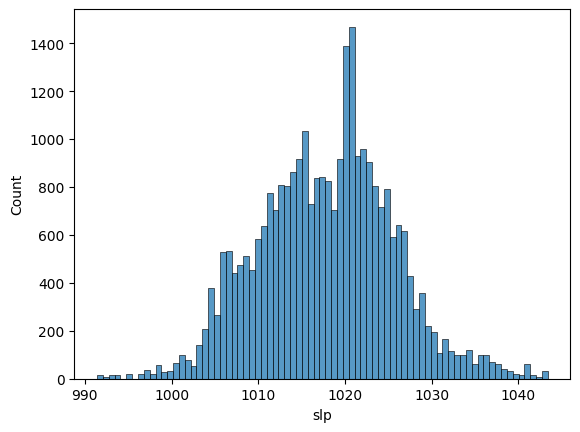

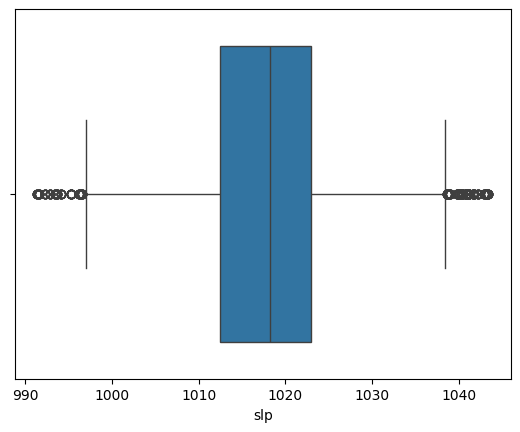

In [ ]:
sns.histplot(data=df,x='slp')
plt.show()
sns.boxplot(data=df,x='slp')
plt.show()

<Axes: xlabel='hday', ylabel='count'>

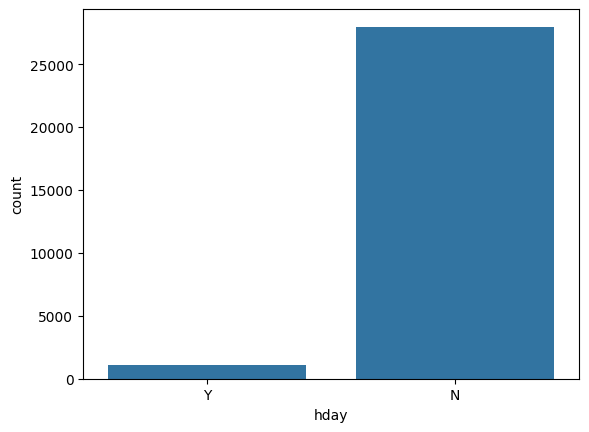

In [ ]:
sns.countplot(data=df,x='hday')

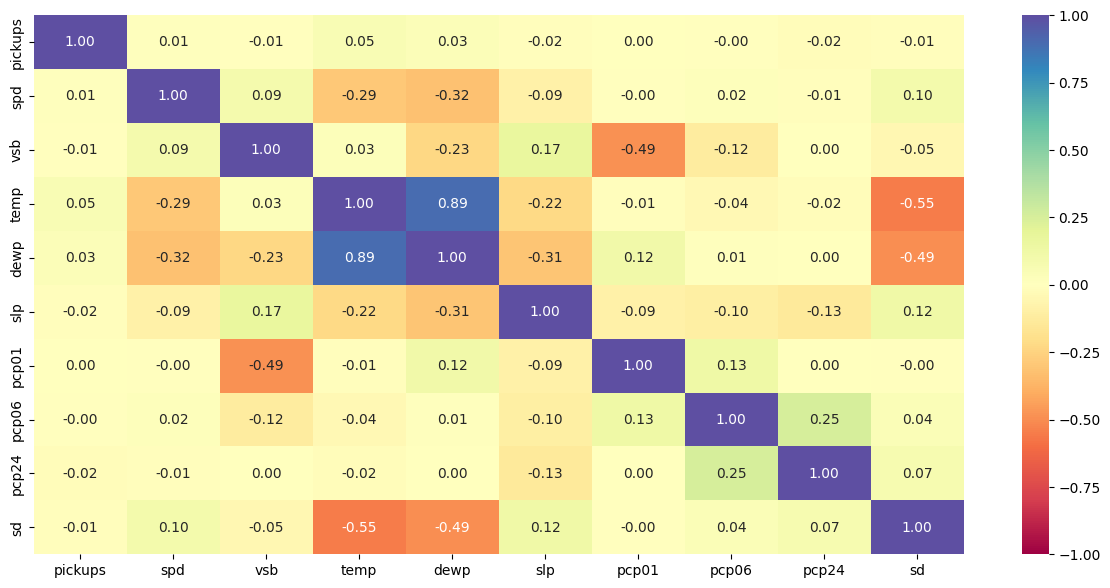

In [ ]:
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
#corr = df[num_var].corr()
corr=df.select_dtypes(include=['int64','float64']).corr()
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

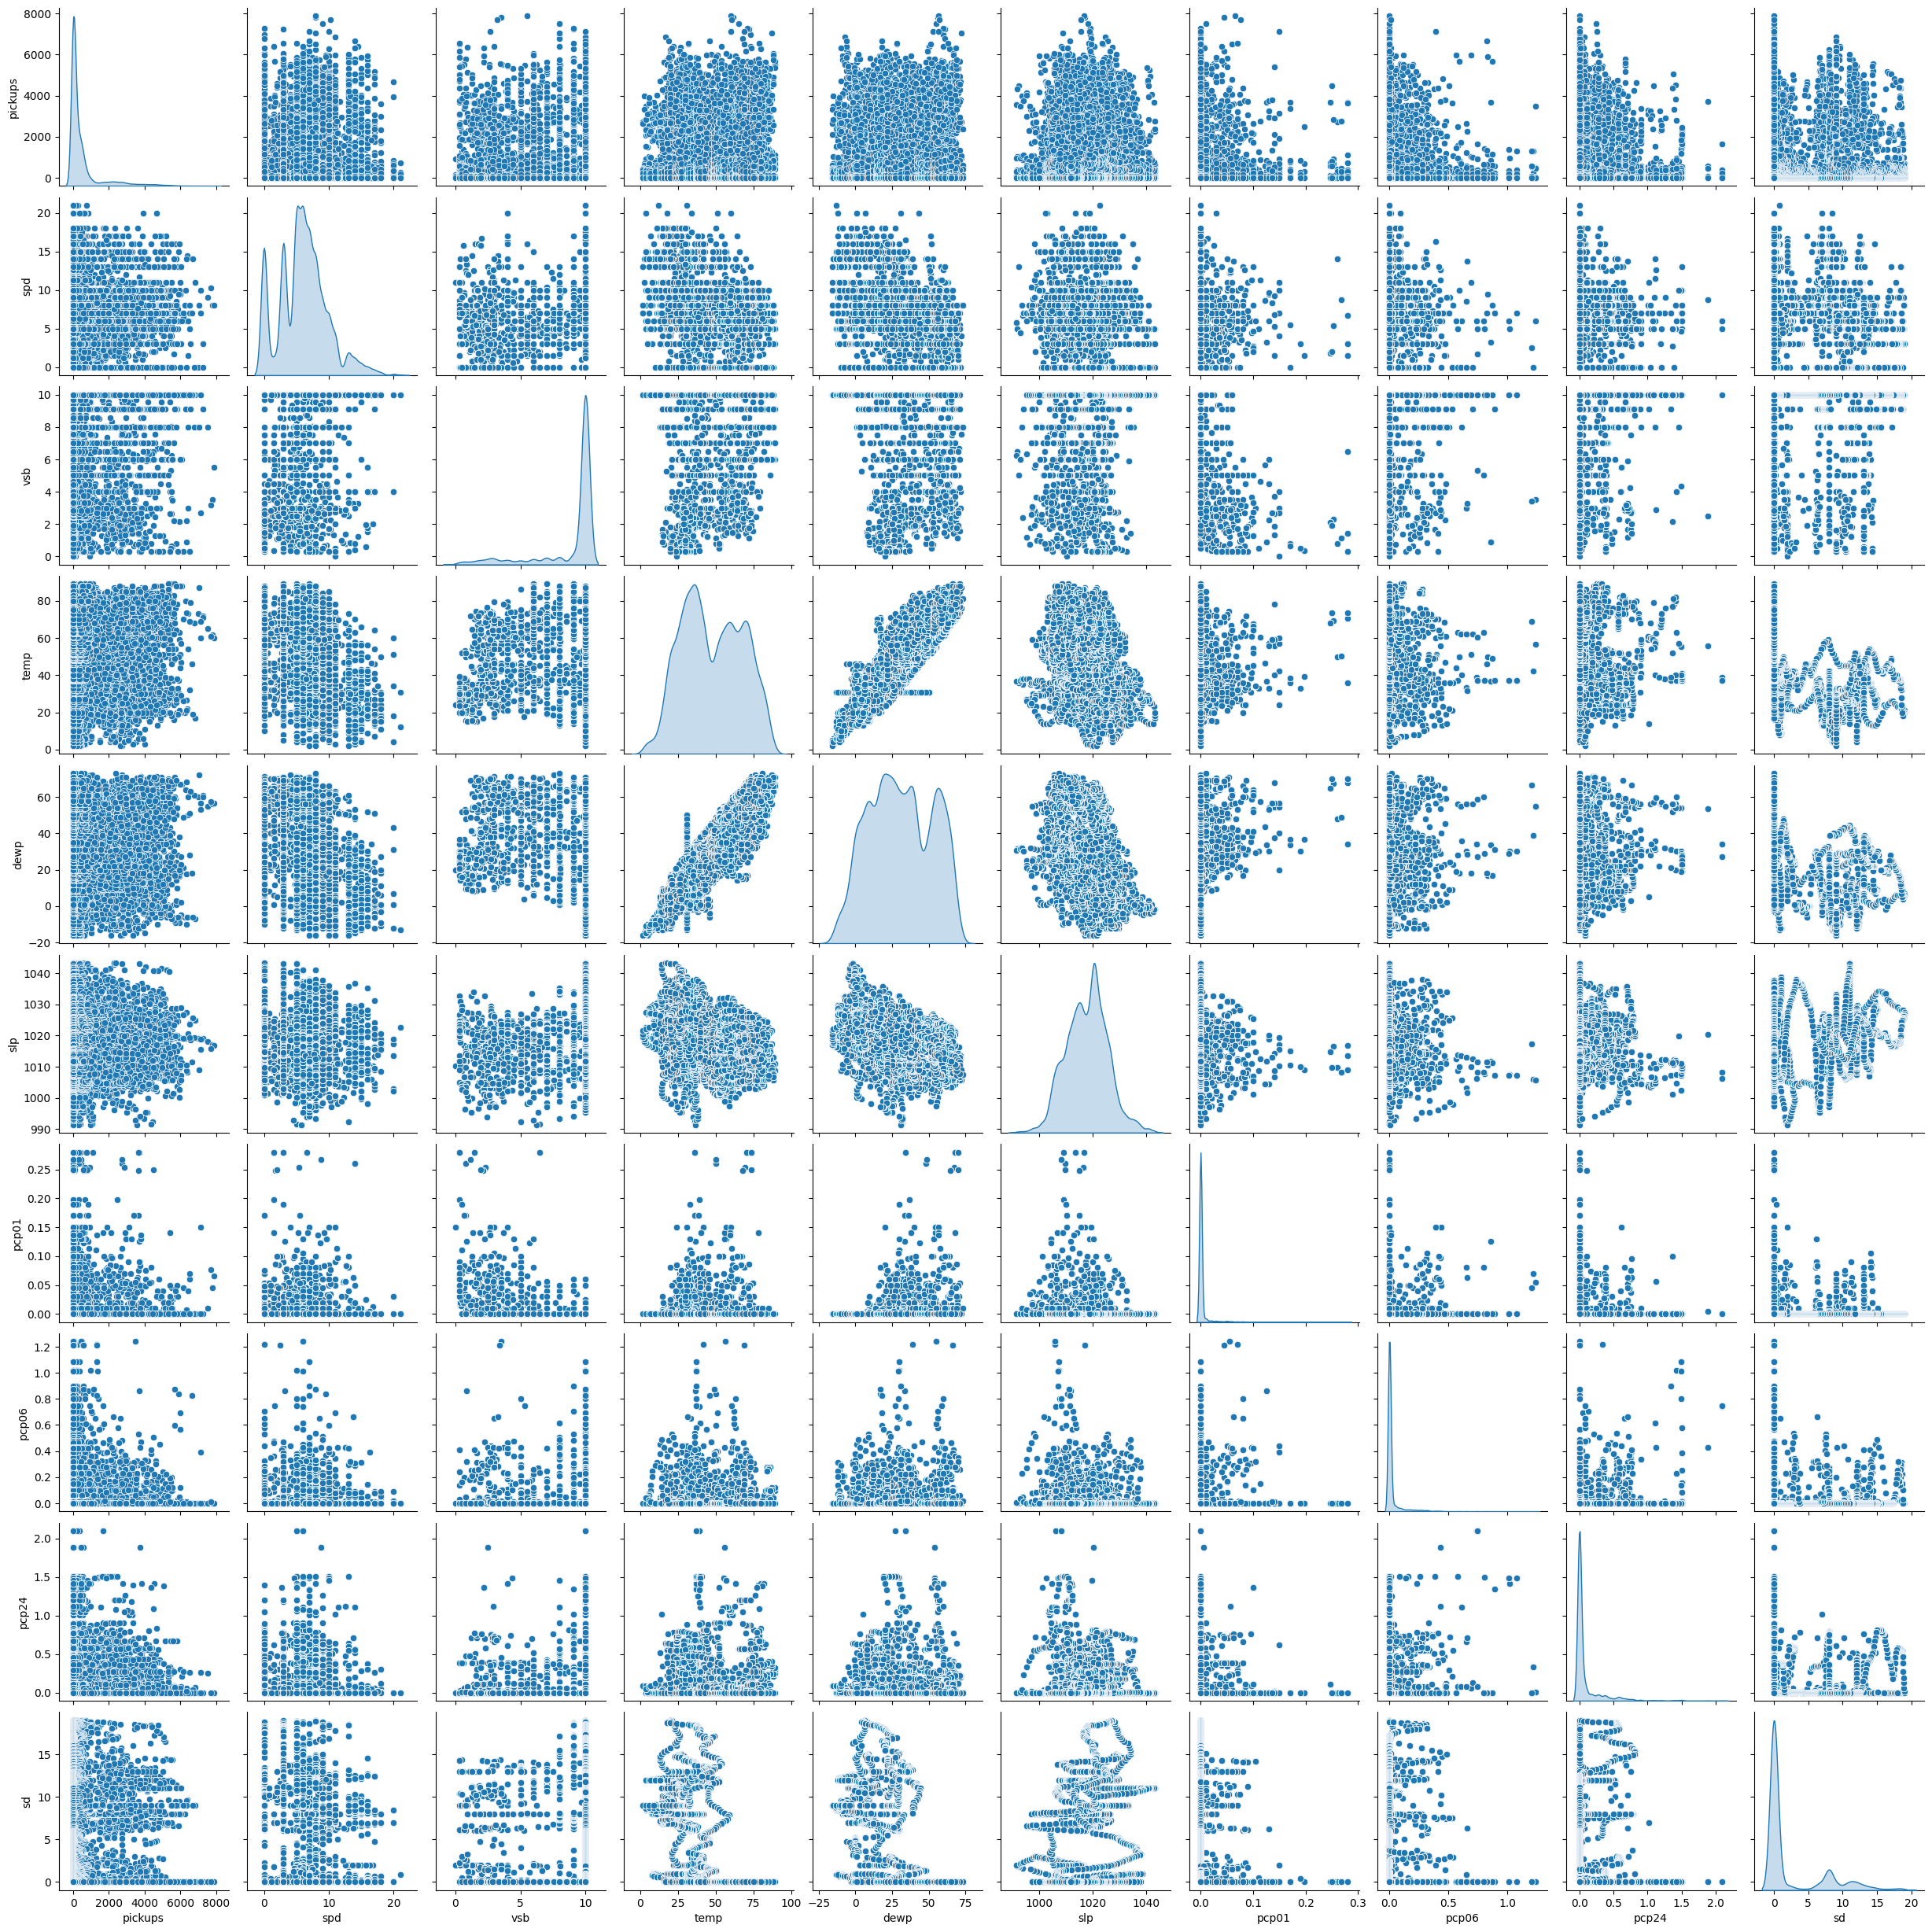

In [ ]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()